In [36]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
drc = np.genfromtxt('catRawMags1305/catDir/drc_useful.dat',names=True)
flc = np.genfromtxt('catRawMags1305/catDir/jdan21l8q_HOROLOGIUM-I_F814W_oc.dat'
                    ,names=True)

In [18]:
dCat = np.genfromtxt('catRawMags1305/catDir/drc_useful.dat')
fCat = np.genfromtxt('catRawMags1305/catDir/jdan21l8q_HOROLOGIUM-I_F814W_oc.dat')

In [21]:
# flc

flags, RA, DEC, xr, yr, flux, c_star, magrF, idF, xc, yc, xo, yo = \
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

In [22]:
# drc

RA, DEC, xD, yD, magrD, idD = 0, 1, 2, 3, 4, 5

In [23]:
d20 = np.argsort(drc['magr'])[:20]
drc20 = drc[d20]
dC20 = dCat[d20]

f20 = np.argsort(flc['magr'])[:20]
flc20 = flc[f20]
fC20 = fCat[f20]

In [31]:
master = fC20[:,[xo,yo,magrF,idF]]
x, y, magR = 0, 1, 2

cat = dC20
matchids = np.zeros((len(master),1))

matchtol = 100
nF = True
row = 0

while nF:
    matchrows = cat[(abs(master[row][x] - cat[:,xD]) \
        <= matchtol) & (abs(master[row][y] - cat[:,yD])<= matchtol)]
    
    if (len(matchrows) == 1):
        matchids[row][0] = matchrows[0][idD]
        row += 1
    
    elif (len(matchrows) > 1):
        distDiff = np.zeros((len(matchrows),1))
        for dd in range(len(matchrows)):
            distDiff[dd] = np.sqrt( (master[row][x] - \
            matchrows[dd][xD])**2 +  (master[row][y] \
                                - matchrows[dd][yD])**2)
        small = np.argmin(distDiff)
        matchids[row][0] = matchrows[small][idD]
        row += 1
        
    else:
        master = np.delete(master,row,0)
        matchids = np.delete(matchids,row,0)
        
    if (row >= len(master)):
        nF = False
        print(len(master))
        
master = np.hstack((master,matchids))
# Header = xo yo magrF idF idD

13


In [33]:
xF, yF, magF, idF, idD = 0, 1, 2, 3, 4

newCols = np.zeros((len(master),3))

idxCol = master[:,idD]
idxD = np.asarray(idxCol,int)
regD = dCat[idxD]

newCols[:,0] = regD[:,xD]
newCols[:,1] = regD[:,yD]
newCols[:,2] = regD[:,magrD]

outArr = np.hstack((master,newCols))
xo, yo, magrF, idF, idD, xD, yD, magrD = 0, 1, 2, 3, 4, 5, 6, 7

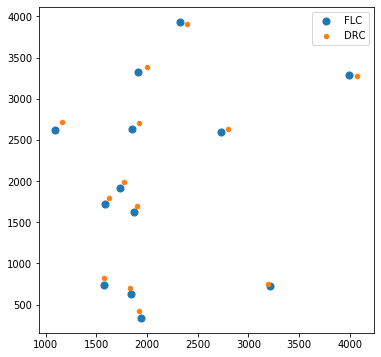

In [37]:
fig, ax = plt.subplots(figsize=(6,6))


ax.scatter(outArr[:,xo],outArr[:,yo],label='FLC',s=50)
ax.scatter(outArr[:,xD],outArr[:,yD],label='DRC',s=20)


ax.legend()
plt.show()

100 pixel tolerance
Turn this into a function..... that is part of a well-oiled machine.
Needs to go in the exact right place - or need another way of assigning indices

Perhaps have a way to have a dynamic pixel matching tolerance?